**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

In this project you will experiment with the Keras library to model and classify data using a deep neural network (DNN).  

Then you will build a convolutional neural network (CNN) model to classify the Modified National Institute of Standards and Technology (MNIST) 'Digits' image dataset.  

You will build, train, and evaluate the performance of a couple different models using single and multiple CNN layers.   

<br>

Follow the instructions in the code cells to complete and test your code. You will replace all triple underscores (___) with your code.   
Please refer to the lecture slides for details on each of the functions/algorithms and hints on the implementation.


# Part 1:  Keras DNN Model on Planar Data

In this part of the project, classify planar data with a DNN framework that you created from scratch and compare against a model implemented with Keras.

The following instructions are identified in the text cells preceding their corresponding code cell. Read through the instructions and write/fill-in the appropriate code in the cells.

**Create the dataset**  

In our project, we’re going to be working with a binary classification planar dataset like the one we used previously. As with the previous DNN framework with adaptive algorithms assignment, we use a "moons" dataset with 100 noisy examples.

Run the code provided to create the dataset, and then call the “make plot” function as you did in the previous unit to see the dataset visualized. This planar dataset could represent any labelled data that is describable in two dimensions.

The shape of the dataset should be the following:
X_train shape: (2, 90)
Y_train shape: (1, 90)
X_test shape: (2, 10)
Y_test shape: (1, 10)

Each example has two features (that is, the x and y coordinates in the plane) and one label (that is, the color of the point).



In [1]:
#Imports and random seed settings
#DO NOT CHANGE THE CODE IN THIS CELL

import numpy as np
import tensorflow as tf
import random
import os
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

import seaborn as sns


# Set random seeds for reproducibility
def set_seeds(seed_value=42):
    """Set seeds for reproducibility."""
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)

    # Set TensorFlow session configuration for deterministic operations
    tf.keras.utils.set_random_seed(seed_value)
    tf.config.experimental.enable_op_determinism()

# Set all seeds
set_seeds()

/Users/hyh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


X_train shape: (90, 2)
X_test shape: (10, 2)
y_train shape: (90,)
y_test shape: (10,)


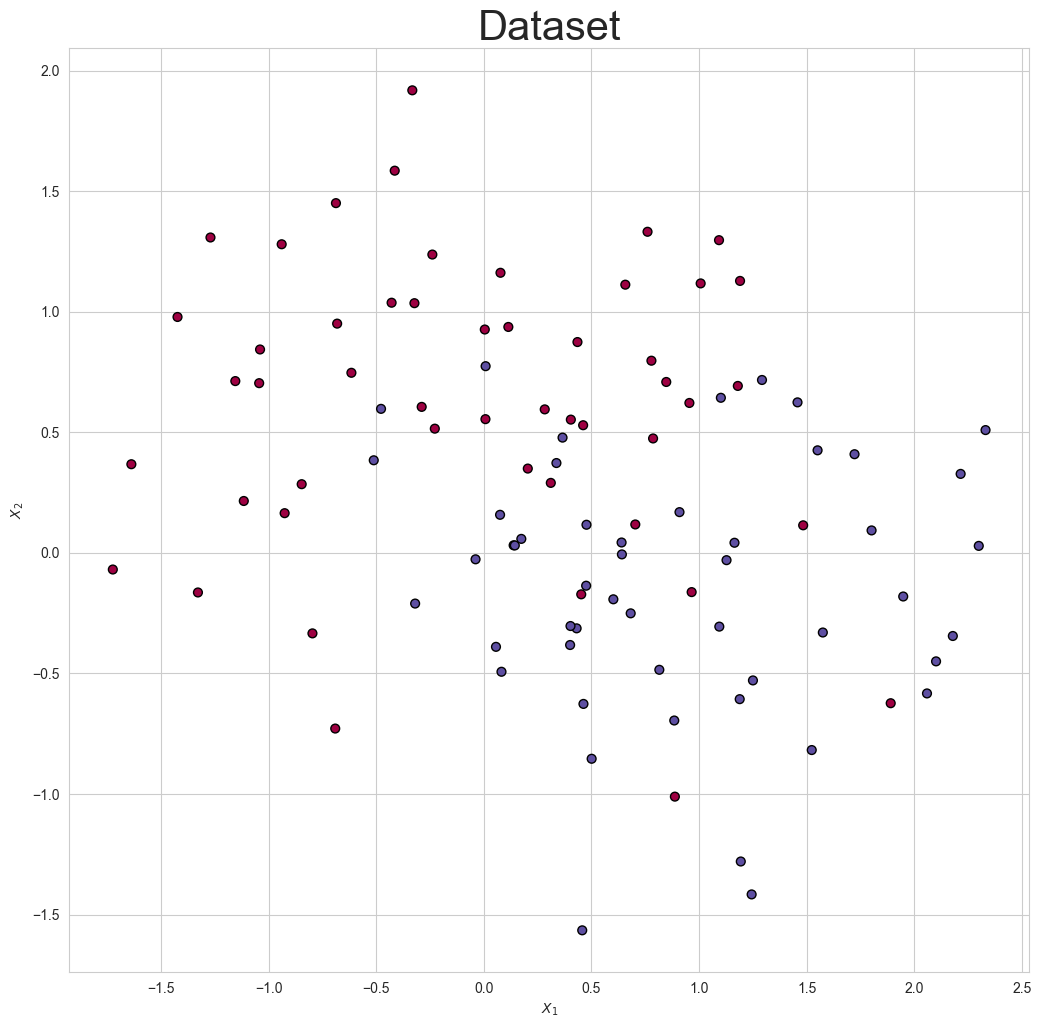

In [2]:
# Use matplotlib to plot the costs

def plot(costs):
  plt.plot(*zip(*costs))
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  return plt

# The function making up the graph of a dataset
# Credit for visualizations: https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795
def make_plot(X, y, plot_name, file_name=None, XX=None, YY=None, preds=None, dark=False):
    if (dark):
        plt.style.use('dark_background')
    else:
        sns.set_style("whitegrid")
    plt.figure(figsize=(16,12))
    axes = plt.gca()
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha = 1, cmap=cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    if(file_name):
        plt.savefig(file_name)
        plt.close()

# number of samples in the data set
N_SAMPLES = 100

# Load the data and split into a train and test set.
X, Y = make_moons(n_samples = N_SAMPLES, noise=0.5, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Call make_plot (pass X, Y, and the name of the plot only).
make_plot(X, Y, "Dataset")

#Print out the shapes of the train and test data
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

##RMSprop
**Create your model**  

Construct a Keras RMSprop model with the following specifications:
- 2 inputs nodes
- Dense (hidden) layers of 25, 50, 50, and 25 nodes each, all layers with ReLU activations
- 1 Dense (output) layer with 1 node, sigmoid activation

Train your model with a learning_rate of 0.0001, a batch size of 16, and set the optimizer to RMSProp with a EMA momentum parameter of 0.999.

<br>

Create an 80/20% split in the dataset.   

Run the training and determine a reasonable number of epochs to produce accuracy scores of at least:   
- Train:  80%
- Test: 80%

Plot the costs, make predictions, and evaluate your train and test accuracy.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,226 (20.41 KB)

 Trainable params: 5,226 (20.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/37


2025-08-23 09:45:20.196329: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-08-23 09:45:20.196662: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4557 - loss: 0.7036 - val_accuracy: 0.8333 - val_loss: 0.6772
Epoch 2/37
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6603 - loss: 0.6784 - val_accuracy: 0.7778 - val_loss: 0.6579
Epoch 3/37
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8403 - loss: 0.6444 - val_accuracy: 0.6111 - val_loss: 0.6406
Epoch 4/37
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7396 - loss: 0.6070 - val_accuracy: 0.6667 - val_loss: 0.6214
Epoch 5/37
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7891 - loss: 0.5625 - val_accuracy: 0.6667 - val_loss: 0.5905
Epoch 6/37
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7876 - loss: 0.5068 - val_accuracy: 0.7222 - val_loss: 0.5317
Epoch 7/37
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8186 - loss: 0.4498 - val_accuracy: 0.7222 - val_loss: 0.4512
Epoch 8/37
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8701 - loss: 0.4123 - val_accuracy: 0.8889 - val_loss: 0.3533
Epoch 9/37
5/5 ━━━

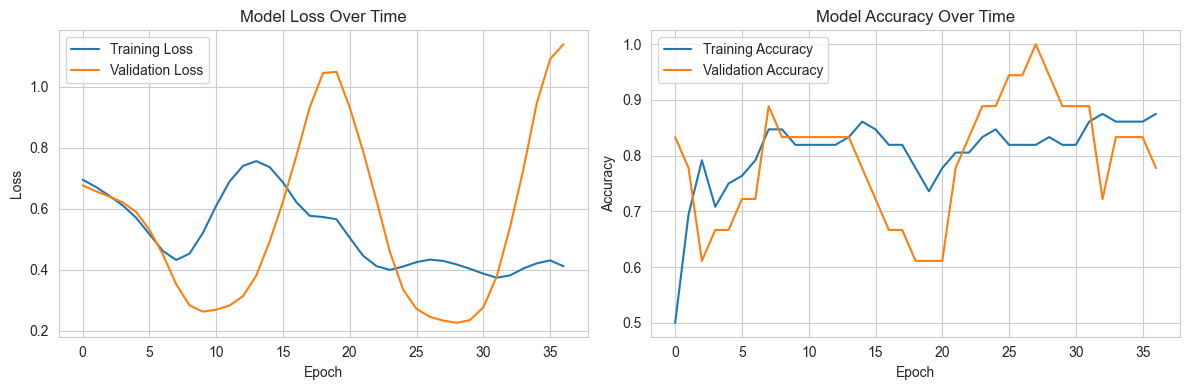

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Final Training Accuracy: 0.8556
Final Test Accuracy: 0.9000

Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        45
           1       0.83      0.89      0.86        45

    accuracy                           0.86        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.86      0.86      0.86        90


Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



TestResults(failed=0, attempted=2)

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop

# Create the model
# 2-independent variable inputs
# inner layers of 25,50,50,25 nodes each
# output layer of 1 node
# ReLU activations for inner layers, Sigmoid activation for output layer
# rmsprop: root-mean-square propagation
rmsprop_model = Sequential([
    Input(shape=(2,)),
    Dense(25, activation='relu'),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Set the optimizer and compile the model
# learning rate = 0.0001, momentum = 0.999
# loss = binary crossentropy
# store accuracy metrics
optimizer = RMSprop(learning_rate=0.0001, momentum=0.999)
rmsprop_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
rmsprop_model.summary()

# Train the model
# batch size = 16
# 80/20% split train/test data

# choose epochs
#history = rmsprop_model.fit(X_train, y_train, validation_split=0.2, batch_size=16, epochs=150)
history = rmsprop_model.fit(X_train, y_train, validation_split=0.2, batch_size=16, epochs=37)

# Plot training history & validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training history & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions for train (X_train) and test (X_test) data
y_train_pred = rmsprop_model.predict(X_train)
y_test_pred = rmsprop_model.predict(X_test)

# Convert probabilities to binary predictions
# if predicted y_train >0.5 then '1' otherwise '0'
y_train_pred_binary = [1 if i>0.5 else 0 for i in y_train_pred]
#y_test_pred_binary = np.where(y_test_pred>0.5, 1, 0)
y_test_pred_binary = [1 if i>0.5 else 0 for i in y_test_pred]

# Evaluate model performance
# Compare predictions with labels and compute mean (hint: use numpy mean function)
train_accuracy = np.mean(y_train == y_train_pred_binary)
test_accuracy = np.mean(y_test == y_test_pred_binary)

print(f"\nFinal Training Accuracy: {train_accuracy:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")

# Display classification report
from sklearn.metrics import classification_report

print("\nTraining Data Classification Report:")
print(classification_report(y_train, y_train_pred_binary))

print("\nTest Data Classification Report:")
print(classification_report(y_test, y_test_pred_binary))

import doctest

'''
  >>> print(train_accuracy>=0.80)
  True
  >>> print(test_accuracy>=0.80)
  True
'''
doctest.testmod()

**RMSprop REFLECTIONS**   
Answer the following:   
1. How did your model perform as compared with the DNN framework model that you implemented previously?
2. How many epochs did you run the training for?  Why did you choose this?
3. How did your model speed compare with the DNN framework model that you implemented previously?

1. How did your model perform as compared with the DNN framework model that you implemented previously? 

   I think in this problem, no previous DNN was implemented(?)

2. How many epochs did you run the training for?  Why did you choose this?

   I ran 37 epochs. Because I found that it is a good choice in terms of the training accuracy and testing accuracy.

3. How did your model speed compare with the DNN framework model that you implemented previously?

   I think in this problem, no previous DNN was implemented(?)

##Adam
**Create your model**  

Construct a Keras Adam model with the following specifications:
- 2 inputs nodes
- Dense (hidden) layers of 25, 50, 50, and 25 nodes each, all layers with ReLU activations
- 1 Dense (output) layer with 1 node, sigmoid activation

Train your model with a learning_rate of 0.0001, a batch size of 16, and set the optimizer to Adam with $\beta_1=0.9$, $\beta_2=0.999$   

<br>

Create an 80/20% split in the dataset.   
Run the training and determine a reasonable number of epochs to produce accuracy scores of at least:   
- Train:  85%
- Test: 80%

Plot the costs, make predictions, and evaluate your train and test accuracy.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,226 (20.41 KB)

 Trainable params: 5,226 (20.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40


2025-08-23 09:56:38.402257: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-08-23 09:56:38.402604: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4583 - loss: 0.7108 - val_accuracy: 0.5000 - val_loss: 0.6953
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4583 - loss: 0.7081 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4583 - loss: 0.7060 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4583 - loss: 0.7039 - val_accuracy: 0.5000 - val_loss: 0.6911
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4583 - loss: 0.7018 - val_accuracy: 0.5000 - val_loss: 0.6897
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4583 - loss: 0.6997 - val_accuracy: 0.5000 - val_loss: 0.6883
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4583 - loss: 0.6976 - val_accuracy: 0.5000 - val_loss: 0.6869
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4583 - loss: 0.6956 - val_accuracy: 0.5000 - val_loss: 0.6855
Epoch 9/40
5/5 ━━━

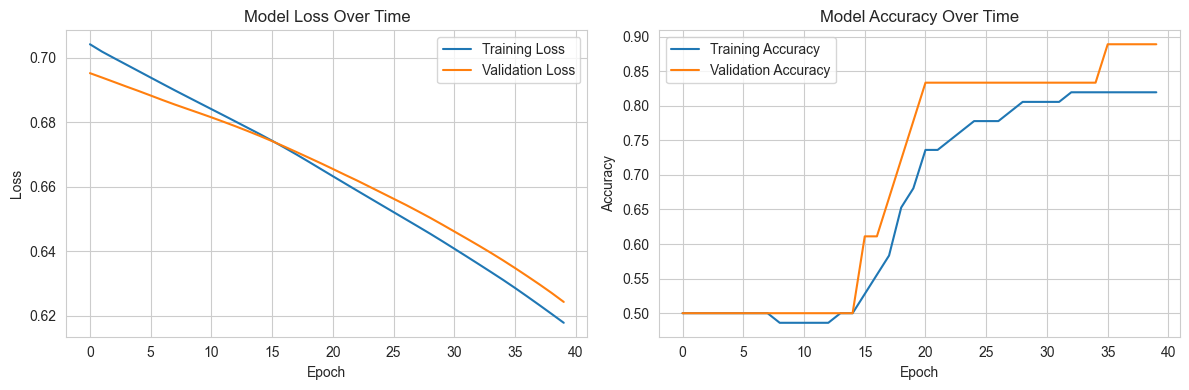

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/stepWARNING:tensorflow:6 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x305bdb0d0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Final Training Accuracy: 0.8333
Final Test Accuracy: 0.9000

Training Data Classification Report:
              precision    recall  f1-score   support

           0 

TestResults(failed=0, attempted=2)

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Create the model
# 2-independent variable inputs
# inner layers of 25,50,50,25 nodes each
# output layer of 1 node
# ReLU activations for inner layers, Sigmoid activation for output layer
adam_model = Sequential([
    Input(shape=(2,)),
    Dense(25, activation='relu'),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Set the optimizer and compile the model
# learning rate = 0.0001, beta1= 0.9, beta2 = 0.999
# loss = binary crossentropy
# store accuracy metrics
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
adam_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


# Display model summary
adam_model.summary()

# Train the model
# batch size = 16
# 80/20% split train/test data
history = adam_model.fit(X_train, y_train, validation_split=0.2, batch_size=16, epochs=40)



# Plot training history & validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training history & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions for train (X_train) and test (X_test) data
y_train_pred = adam_model.predict(X_train)
y_test_pred = adam_model.predict(X_test)

# Convert probabilities to binary predictions
# if predicted y_train >0.5 then '1' otherwise '0'
y_train_pred_binary = (y_train_pred > 0.5).astype(int)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Evaluate model performance
# Compare predictions with labels and compute mean (hint: use numpy mean function)
train_accuracy = (y_train_pred_binary.flatten() == y_train).mean()
test_accuracy = (y_test_pred_binary.flatten() == y_test).mean()

print(f"\nFinal Training Accuracy: {train_accuracy:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")

# Display classification report
from sklearn.metrics import classification_report

print("\nTraining Data Classification Report:")
print(classification_report(y_train, y_train_pred_binary))

print("\nTest Data Classification Report:")
print(classification_report(y_test, y_test_pred_binary))

import doctest

'''
  >>> print(train_accuracy>0.82)
  True
  >>> print(test_accuracy>0.799)
  True
'''
doctest.testmod()

**Adam REFLECTIONS**   
Answer the following:   
1. How did your model perform as compared with the DNN framework model that you implemented previously?
2. How many epochs did you run the training for?  Why did you choose this?
3. How did your model speed compare with the DNN framework model that you implemented previously?

1. How did your model perform as compared with the DNN framework model that you implemented previously?

   Compared to the previous DNN model, that is, the RMSprop, I think the performance is similar(?). Both have relatively high training accuracy (0.8+) and high testing accuracy (0.9+)

2. How many epochs did you run the training for?  Why did you choose this?

   I ran 40 epochs. Because I found that it is a good choice in terms of the training accuracy and testing accuracy. 

3. How did your model speed compare with the DNN framework model that you implemented previously?

   I think the two models have similar speed in this small-epochs, but when I increased the epoch numbers, I think Adam would be a bit quicklier than the RMSprop. 

# Part 2:  Keras CNN Model on Image Data

**Create the dataset**  

In our project, we’re going to be working with a categorical classification image dataset like the one we used previously. As with the previous DNN + CNN framework, we'll use the MNIST digits dataset.

Run the code provided to create the dataset.



In [6]:
# Load and prepare the data

import numpy as np
from tensorflow.keras.datasets import mnist


def load_preprocess_mnist_data():
  (X_train, y_train), (X_test, y_test) = mnist.load_data()

  # Limit to 1000 training examples
  train_size = 1000
  X_train = X_train[:train_size]
  y_train = y_train[:train_size]

  # Normalize and reshape X data
  X_train = X_train.astype('float32') / 255.0
  X_test = X_test.astype('float32') / 255.0
  X_train = X_train.reshape(-1, 28, 28, 1)
  X_test = X_test.reshape(-1, 28, 28, 1)


  # Prepare y data
  y_train_encoded = np.zeros((y_train.shape[0], 10))
  y_test_encoded = np.zeros((y_test.shape[0], 10))
  for i in range(y_train.shape[0]):
      y_train_encoded[i, y_train[i]] = 1
  for i in range(y_test.shape[0]):
      y_test_encoded[i, y_test[i]] = 1

  return (X_train, y_train_encoded), (X_test, y_test_encoded)

##Compare 1 and 2 layer CNN models

1. Run the following cell to create a dataset of MNIST digits.  You must run this cell with the limits and reshaping shown.


2. Construct two Keras CNN models with the following specifications:   
  Model 1:
  - 1 convolutional layer, 5 kernels each 3x3, sigmoid activation
  - 1 Dense layer (hidden layer), 100 nodes, sigmoid activation,
  - 1 Dense layer (output layer), 10 output nodes, softmax activation
  - categorical cross-entropy loss function
  - batch size = number of training examples
  - optimizer = gradient decent, learning rate=0.01, momentum=0.9
  - leave all other Keras model parameters as their defaults

  Model 2:
  - 2 convolutional layers, 5 kernels each 3x3, sigmoid activation
  - 1 Dense layer (hidden layer), 100 nodes, sigmoid activation,
  - 1 Dense layer (output layer), 10 output nodes, softmax activation
  - categorical cross-entropy loss function
  - batch size = 32
  - optimizer = Adam, learning_rate=0.001, beta_1=0.9, beta_2=0.999
  - leave all other Keras model parameters as their defaults

3. Train your model with an 80/20% split.  Your model must demonstrate at least the following accuracy:   
Model 1: train accuracy > 90%, test accuracy > 85%   
Model 2: train accuracy > 98%, test accuracy > 87%

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Training single_conv

single_conv architecture:


/Users/hyh/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,770,634 (10.57 MB)

 Trainable params: 2,770,634 (10.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-08-06 08:50:11.211690: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-08-06 08:50:11.212183: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5750 - loss: 1.3678 - val_accuracy: 0.8419 - val_loss: 0.5335
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9021 - loss: 0.4003 - val_accuracy: 0.8832 - val_loss: 0.3855
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9603 - loss: 0.1646 - val_accuracy: 0.8871 - val_loss: 0.3862
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9827 - loss: 0.0871 - val_accuracy: 0.8862 - val_loss: 0.4193
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9905 - loss: 0.0450 - val_accuracy: 0.8849 - val_loss: 0.4393
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9971 - loss: 0.0206 - val_accuracy: 0.8958 - val_loss: 0.3939
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 0.8994 - val_loss: 0.3947
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9012 - val_loss: 0.

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,738,826 (18.08 MB)

 Trainable params: 4,738,826 (18.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-08-06 08:50:19.196302: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-08-06 08:50:19.196631: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.5132 - loss: 1.4609 - val_accuracy: 0.8024 - val_loss: 0.6750
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.8790 - loss: 0.5182 - val_accuracy: 0.8927 - val_loss: 0.3581
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.9535 - loss: 0.2104 - val_accuracy: 0.8969 - val_loss: 0.3537
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.9708 - loss: 0.1259 - val_accuracy: 0.8904 - val_loss: 0.3754
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.9944 - loss: 0.0354 - val_accuracy: 0.8930 - val_loss: 0.4181
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.9963 - loss: 0.0173 - val_accuracy: 0.8926 - val_loss: 0.4530
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.9992 - loss: 0.0075 - val_accuracy: 0.8841 - val_loss: 0.5437
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.9909 - loss: 0.0278 - val_accuracy: 0.8940 - val_

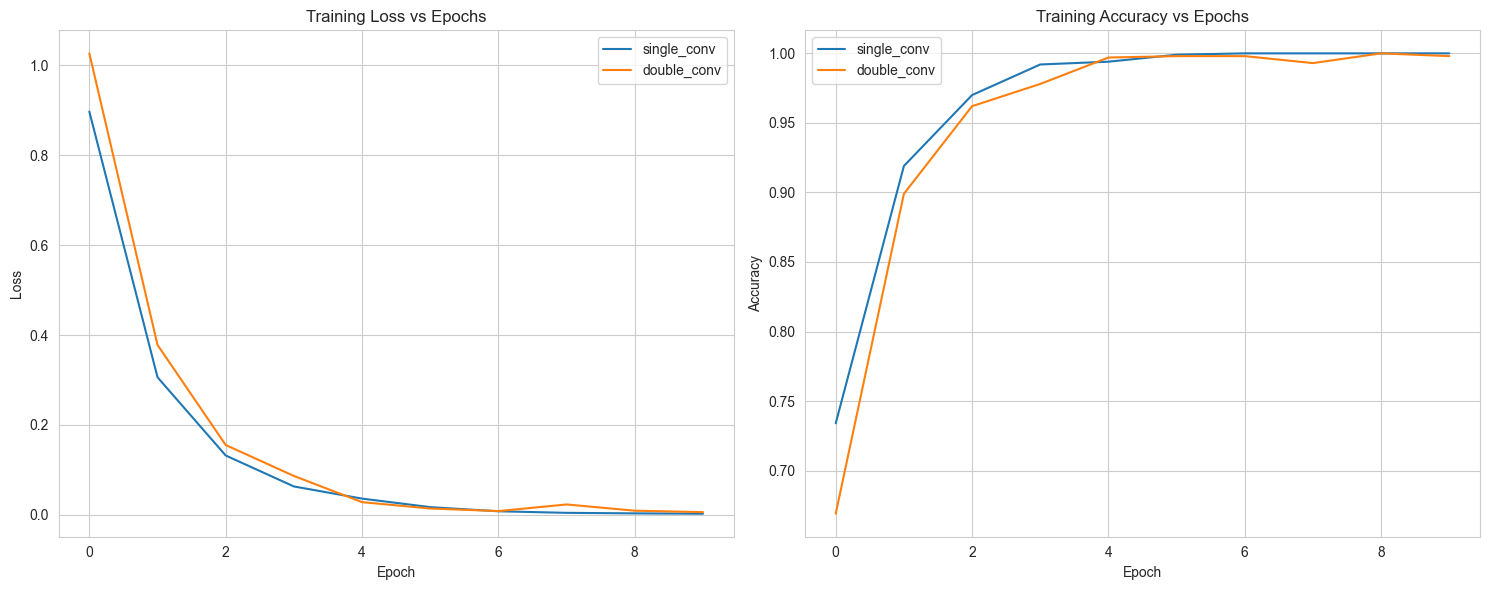


Final Training Metrics:

single_conv:
  Loss: 0.0022
  Accuracy: 1.0000


2025-08-06 08:50:38.188750: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-08-06 08:50:38.189159: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

  Test Accuracy: 0.9027

double_conv:
  Loss: 0.0057
  Accuracy: 0.9980
  Test Accuracy: 0.9125
X_train shape: (1000, 28, 28, 1)
y_train shape: (1000, 10)
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)
1 conv2d layer: train accuracy 1.0
1 conv2d layer: test accuracy 0.9027000069618225
2 conv2d layer: train accuracy 0.9980000257492065
2 conv2d layer: test accuracy 0.9125000238418579


TestResults(failed=0, attempted=8)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tfa
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten


#Reset the random seeds for reproducibility (DO NOT CHANGE)
set_seeds()

# Load and prepare the data
# Call the load_preprocess_mnist_data function
(X_train, y_train), (X_test, y_test) = load_preprocess_mnist_data()

# Limit to 1000 training examples
train_size = 1000
X_train = X_train[:train_size]
y_train = y_train[:train_size]

# Create models - one with single Conv2D and one with two Conv2D layers
# See the text cell above for model parameter requirements
# Set up a dictionary data structure for the single and double Conv2D layer options.
models = {
    'single_conv': Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]),

    'double_conv': Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
}

# Set the optimizers
# See the text cell above for optimizer parameter requirements
# Set up a dictionary data structure for the single and double Conv2D layer options.
optimizers = {
    'single_conv': Adam(learning_rate=0.001),
    'double_conv': Adam(learning_rate=0.001)
}

# Set the training batch sizes
# Set up a dictionary data structure for the single and double Conv2D layer options.
batch_sizes = {
    'single_conv': 32,
    'double_conv': 64
}

# Set the number of training iterations (epochs)
# Set up a dictionary data structure for the single and double Conv2D layer options.
epochs = {
    'single_conv': 10,
    'double_conv': 10
}

# Train both models and store histories
histories = {}
for model_name, model in models.items():
    print(f"\nTraining {model_name}")

    #Compile the model
    model.compile(optimizer=optimizers[model_name],
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Print model summary
    print(f"\n{model_name} architecture:")
    model.summary()

    #Fit the model
    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        batch_size=batch_sizes[model_name],
                        epochs=epochs[model_name])

    histories[model_name] = history.history

# Create visualization
plt.figure(figsize=(15,6))

# Plot training loss
plt.subplot(1,2,1)
for model_name in histories:
    plt.plot(histories[model_name]['loss'],
             label=f'{model_name}')
plt.title('Training Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1,2,2)
for model_name in histories:
    plt.plot(histories[model_name]['accuracy'],
             label=f'{model_name}')
plt.title('Training Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Print final metrics for both models
print("\nFinal Training Metrics:")
for model_name in histories:
    final_loss = histories[model_name]['loss'][-1]
    final_acc = histories[model_name]['accuracy'][-1]
    print(f"\n{model_name}:")
    print(f"  Loss: {final_loss:.4f}")
    print(f"  Accuracy: {final_acc:.4f}")

    # Evaluate on test set
    test_loss, test_acc = models[model_name].evaluate(X_test, y_test, verbose=0)
    print(f"  Test Accuracy: {test_acc:.4f}")


#Do not modify the code below this line
#For validation purposes
import doctest

# Print shapes of train and test data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print('1 conv2d layer: train accuracy', histories['single_conv']['accuracy'][-1])
print('1 conv2d layer: test accuracy', models['single_conv'].evaluate(X_test, y_test, verbose=0)[1])
print('2 conv2d layer: train accuracy', histories['double_conv']['accuracy'][-1])
print('2 conv2d layer: test accuracy', models['double_conv'].evaluate(X_test, y_test, verbose=0)[1])

'''
  >>> print(X_train.shape)
  (1000, 28, 28, 1)
  >>> print(y_train.shape)
  (1000, 10)
  >>> print(X_test.shape)
  (10000, 28, 28, 1)
  >>> print(y_test.shape)
  (10000, 10)
  >>> print(histories['single_conv']['accuracy'][-1]>0.9)
  True
  >>> print(models['single_conv'].evaluate(X_test, y_test, verbose=0)[1]>0.85)
  True
  >>> print(histories['double_conv']['accuracy'][-1]>0.98)
  True
  >>> print(models['double_conv'].evaluate(X_test, y_test, verbose=0)[1]>0.87)
  True
'''

doctest.testmod()

**CNN REFLECTIONS**   
Answer the following:   
1. How did your model perform as compared with the CNN+DNN framework model that you implemented previously?
2. How many epochs did you run the training for?  Why did you choose this?
3. How did your model speed compare with the DNN framework model that you implemented previously?

CNN Reflections:

1. How did your model perform as compared with the CNN+DNN framework model that you implemented previously?

   I think this model outperforms the DNN models I implemented previously. Because it has higher train and test accuracy, and it takes fewer epochs to get there.

2. How many epochs did you run the training for?  Why did you choose this?

   I chose 10. It is a small number, but from the graphs we can see that the curves quickly become flat (quite steep at the first few epochs), and the accuracy looks good.

3. How did your model speed compare with the DNN framework model that you implemented previously?

​	It is more slowly in each epoch (about 100 ms for this model, but less than 10 ms for the DNN models); however, it takes much fewer epochs to get to a satisfactory result.